In [1]:
##Task 3 : Airbnb Dataset EDA 

import pandas as pd

# Loading the uploaded Airbnb dataset
file_path = "AB_NYC_2019.xlsx"
airbnb_data = pd.read_excel(file_path)

# to show the first few rows of the dataset to understand its structure
airbnb_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
#To check for missing values in the dataset
missing_values = airbnb_data.isnull().sum()

# To calculate basic statistics for numerical columns to identify potential outliers
basic_stats = airbnb_data.describe()

# to display the missing values and basic statistics
missing_values, basic_stats


(id                                    0
 name                                 26
 host_id                               0
 host_name                            22
 neighbourhood_group                   0
 neighbourhood                         0
 latitude                              0
 longitude                             0
 room_type                             0
 price                                 0
 minimum_nights                        0
 number_of_reviews                     0
 last_review                       10052
 reviews_per_month                 10052
 calculated_host_listings_count        0
 availability_365                      0
 dtype: int64,
                  id       host_id      latitude     longitude         price  \
 count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
 mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
 std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
 min    2

Missing Values Analysis:
Name: 26 missing values.
Host Name: 22 missing values.
Last Review: 10,052 missing values.
Reviews per Month: 10,052 missing values.
These missing values in last_review and reviews_per_month likely occur in listings that have not yet received any reviews.

In [3]:
# To replace missing values in 'reviews_per_month' with 0 assuming no reviews 
airbnb_data['reviews_per_month'].fillna(0, inplace=True)

# To replace missing values in 'last_review' with 'No Reviews'
airbnb_data['last_review'].fillna('No Reviews', inplace=True)

# To remove listings with a price of 0
airbnb_data = airbnb_data[airbnb_data['price'] > 0]

# To remove outliers for 'minimum_nights' assuming a reasonable threshold of 365 nights for typical Airbnb use cases
airbnb_data = airbnb_data[airbnb_data['minimum_nights'] <= 365]

# Finally check the changes
cleaned_data_info = airbnb_data.describe()

# And display the cleaned data statistics
cleaned_data_info


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887000e+04,4.887000e+04,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000
mean,1.901848e+07,6.762985e+07,40.728952,-73.952172,152.759402,6.840311,23.277143,1.091070,7.146286,112.728443
std,1.098393e+07,7.862005e+07,0.054534,0.046163,240.199363,16.453077,44.556389,1.597354,32.960753,131.596499
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.821708e+06,40.690092,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967676e+07,3.080150e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915342e+07,1.074344e+08,40.763127,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


Key Statistics After Cleaning:

Price:
Minimum: 10 USD.
Maximum: 10,000 USD (still high, but retained for high-end listings).
Median: 106 USD.
Minimum Nights:

Mean: ~6.8 nights.
Maximum: 365 nights (suggesting long-term rentals).

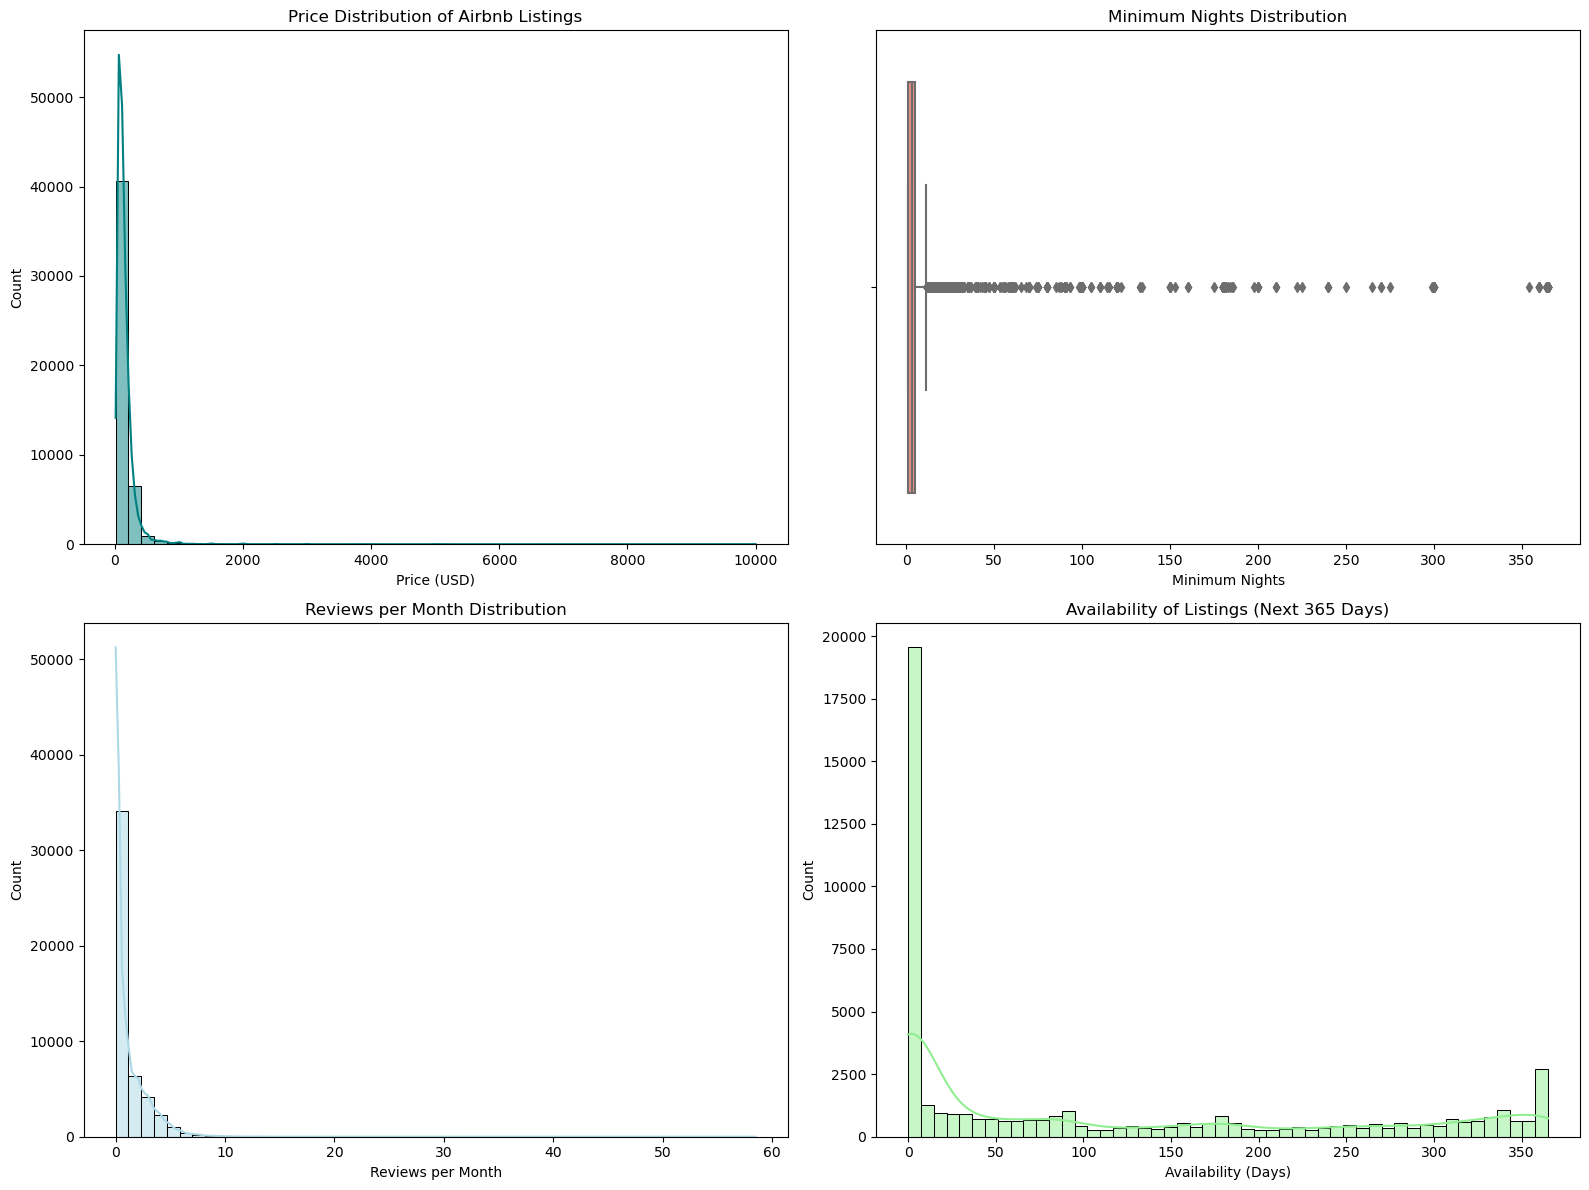

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# First we set up the plotting environment
plt.figure(figsize=(16, 12))

# 1. For price Distribution
plt.subplot(2, 2, 1)
sns.histplot(airbnb_data['price'], bins=50, kde=True, color='teal')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (USD)')

# 2. For Minimum Nights Distribution
plt.subplot(2, 2, 2)
sns.boxplot(x=airbnb_data['minimum_nights'], color='salmon')
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')

# 3.For Reviews per Month Distribution
plt.subplot(2, 2, 3)
sns.histplot(airbnb_data['reviews_per_month'], bins=50, kde=True, color='lightblue')
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')

# 4. For Availability Distribution
plt.subplot(2, 2, 4)
sns.histplot(airbnb_data['availability_365'], bins=50, kde=True, color='lightgreen')
plt.title('Availability of Listings (Next 365 Days)')
plt.xlabel('Availability (Days)')

# And Display all plots
plt.tight_layout()
plt.show()


Visual Analysis:

Price Distribution:
Most listings are priced under 200 USD.
There is a long tail for higher-priced listings, indicating a few high-end or luxury properties.

Minimum Nights Distribution:
A majority of the listings have a low minimum night requirement, with a median of 3 nights.
There are some long-term rental listings that have a higher minimum night requirement, but they are less common.

Reviews per Month Distribution:
Most listings receive fewer than 2 reviews per month, suggesting moderate booking activity.
A few listings receive a significantly higher number of reviews, indicating popular properties.

Availability Distribution:
There is a large variation in availability, with many listings having very low or very high availability.
Some listings are fully booked (0 days available), while others are completely open (365 days available).

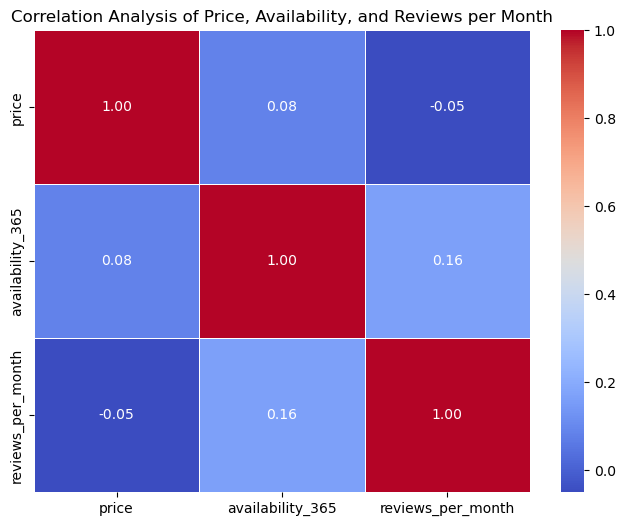

,price,availability_365,reviews_per_month
price,1.000000,0.081876,-0.050540
availability_365,0.081876,1.000000,0.163978
reviews_per_month,-0.050540,0.163978,1.000000


In [5]:
#Now we see the correlation between the variables  
#first we calculate the correlation matrix for selected variables
correlation_matrix = airbnb_data[['price', 'availability_365', 'reviews_per_month']].corr()

# And then visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Analysis of Price, Availability, and Reviews per Month')
plt.show()

correlation_matrix


Correlation Analysis Summary:

Price and Availability:
Correlation coefficient: 0.082
Weak positive correlation, indicating that higher-priced listings tend to have slightly higher availability, but the relationship is not strong.

Price and Reviews per Month:
Correlation coefficient: -0.051
Weak negative correlation, suggesting that lower-priced listings receive slightly more reviews, but this relationship is also minimal.

Availability and Reviews per Month:
Correlation coefficient: 0.164
Moderate positive correlation, indicating that listings with higher availability receive more reviews. This could imply that properties with higher availability attract more guests, leading to more frequent reviews.

In conclusion :
The weak correlations suggest that other factors (e.g., location, room type) may have a stronger influence on the pricing and review patterns of Airbnb listings.
The positive relationship between availability and reviews may indicate that highly reviewed properties maintain flexible availability.

In [6]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


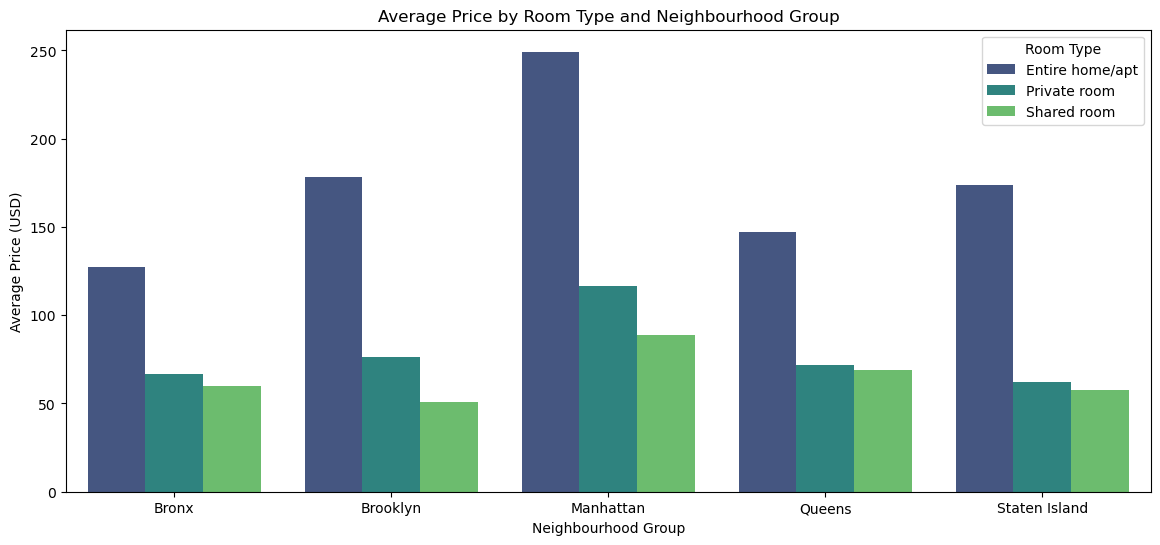

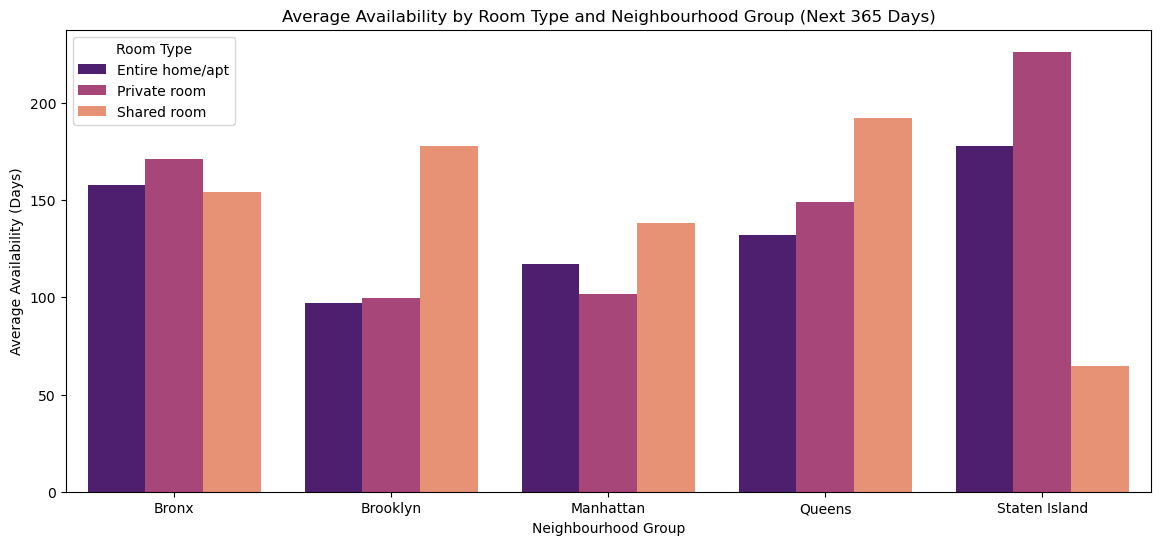

   neighbourhood_group        room_type  mean_price  mean_availability
0                Bronx  Entire home/apt  127.506596         158.000000
1                Bronx     Private room   66.890937         171.399386
2                Bronx      Shared room   59.800000         154.216667
3             Brooklyn  Entire home/apt  178.356844          97.155190
4             Brooklyn     Private room   76.553547          99.846769
5             Brooklyn      Shared room   50.773723         177.725061
6            Manhattan  Entire home/apt  249.276359         117.080876
7            Manhattan     Private room  116.776622         101.845026
8            Manhattan      Shared room   88.933194         138.100209
9               Queens  Entire home/apt  147.031996         132.176218
10              Queens     Private room   71.762456         149.222716
11              Queens      Shared room   69.020202         192.186869
12       Staten Island  Entire home/apt  173.846591         178.073864
13    

In [8]:
# Now we assess the impact of room type and neighborhood on pricing and availability trends.
#Group the data by 'neighbourhood_group' and 'room_type' to calculate the mean price and availability

room_neighborhood_stats = airbnb_data.groupby(['neighbourhood_group', 'room_type']).agg(
    mean_price=('price', 'mean'),
    mean_availability=('availability_365', 'mean')
).reset_index()

# To visualize the impact of room type and neighborhood on pricing
plt.figure(figsize=(14, 6))
sns.barplot(x='neighbourhood_group', y='mean_price', hue='room_type', data=room_neighborhood_stats, palette='viridis')
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price (USD)')
plt.legend(title='Room Type')
plt.show()

# To visualize the impact of room type and neighborhood on availability
plt.figure(figsize=(14, 6))
sns.barplot(x='neighbourhood_group', y='mean_availability', hue='room_type', data=room_neighborhood_stats, palette='magma')
plt.title('Average Availability by Room Type and Neighbourhood Group (Next 365 Days)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (Days)')
plt.legend(title='Room Type')
plt.show()

print(room_neighborhood_stats)



Room Type and Neighborhood Analysis Summary:

Average Price by Room Type and Neighborhood:
Manhattan has the highest average prices across all room types, especially for "Entire home/apt".
Brooklyn also commands relatively high prices but remains lower than Manhattan.
Bronx and Staten Island have the lowest average prices, regardless of room type.
Shared Rooms have the lowest prices, while Entire home/apt listings have the highest prices.

Average Availability by Room Type and Neighborhood:
Staten Island and Bronx have the highest average availability for listings, indicating lower booking rates.
Manhattan has the lowest availability on average, reflecting high demand and frequent bookings.
Private rooms tend to have higher availability compared to "Entire home/apt" listings, suggesting that "Entire home/apt" listings are booked more frequently.


Conclusion: 
Manhattan is the premium location for Airbnb listings, with high prices and lower availability, indicating strong demand.
Bronx and Staten Island have more available days, possibly due to lower demand or less competitive pricing.

In [ ]:
#EDA for Host Demographics

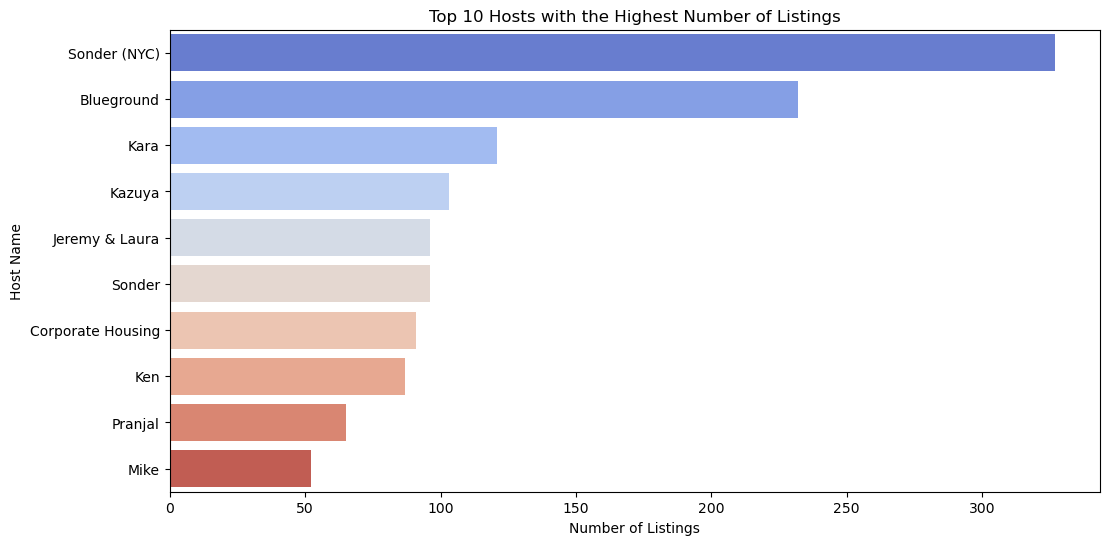

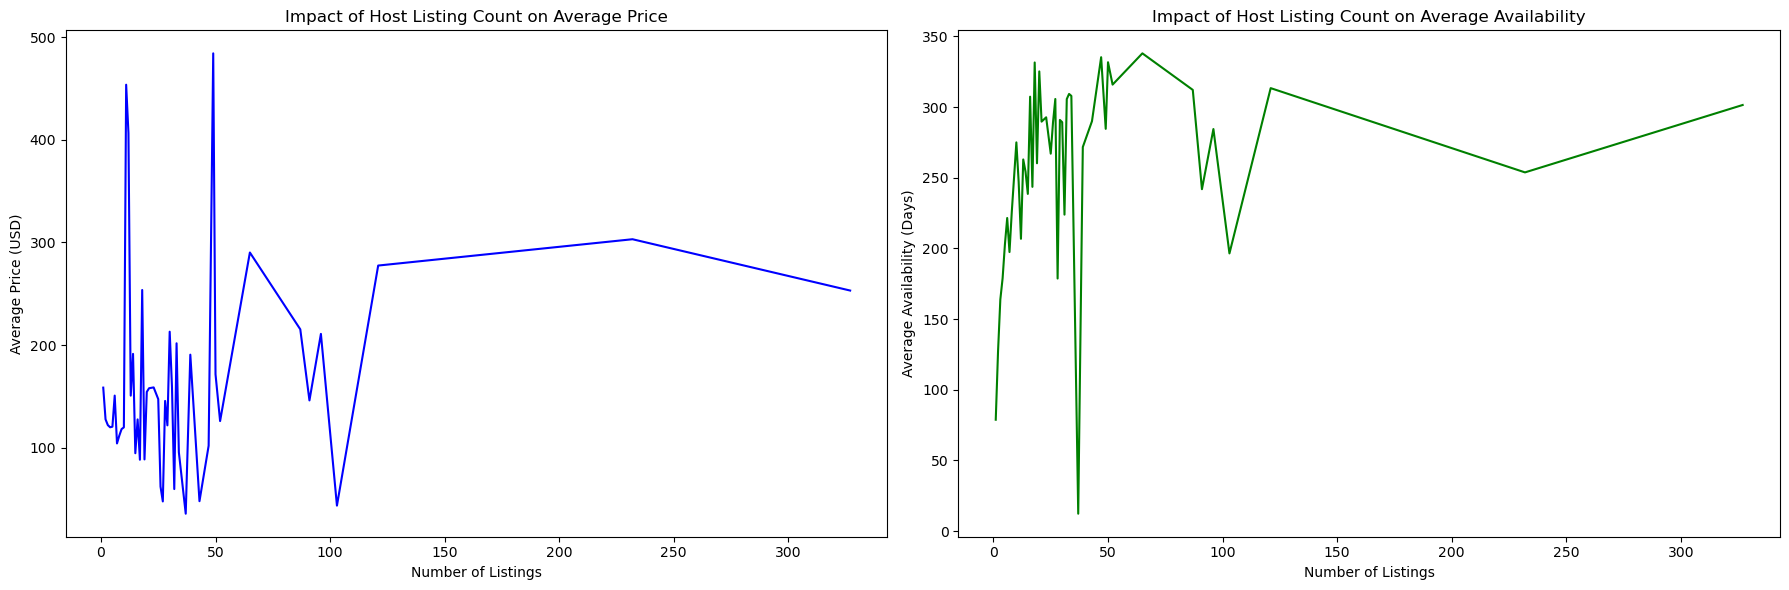

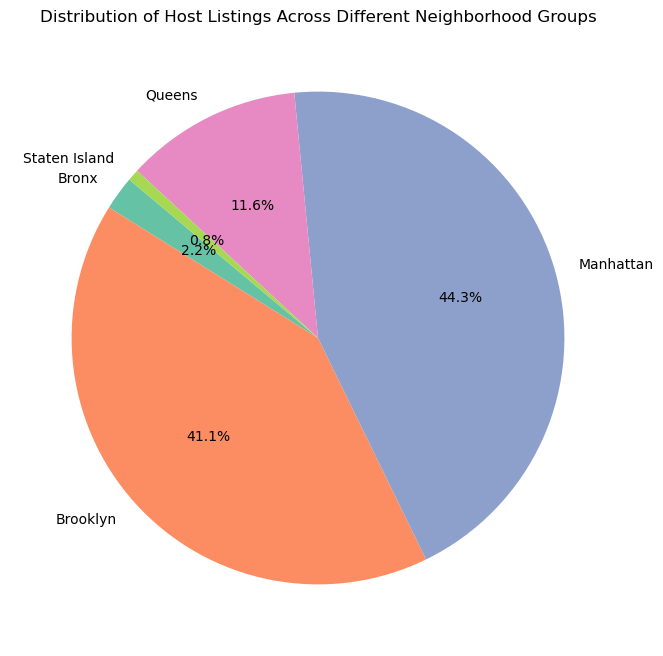

In [9]:
# First we analyze top hosts with multiple listings
top_hosts = airbnb_data.groupby('host_name')['calculated_host_listings_count'].max().reset_index()
top_hosts = top_hosts.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

# Then plot top hosts with multiple listings
plt.figure(figsize=(12, 6))
sns.barplot(x='calculated_host_listings_count', y='host_name', data=top_hosts, palette='coolwarm')
plt.title('Top 10 Hosts with the Highest Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.show()

# Now to analyze the impact of hosts with multiple properties on pricing
host_impact = airbnb_data.groupby('calculated_host_listings_count').agg(
    mean_price=('price', 'mean'),
    mean_availability=('availability_365', 'mean')
).reset_index()

# And plot impact of host's listing count on pricing and availability
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# 1. Impact on Price
sns.lineplot(x='calculated_host_listings_count', y='mean_price', data=host_impact, ax=ax[0], color='blue')
ax[0].set_title('Impact of Host Listing Count on Average Price')
ax[0].set_xlabel('Number of Listings')
ax[0].set_ylabel('Average Price (USD)')

# 2. To check the impact on Availability
sns.lineplot(x='calculated_host_listings_count', y='mean_availability', data=host_impact, ax=ax[1], color='green')
ax[1].set_title('Impact of Host Listing Count on Average Availability')
ax[1].set_xlabel('Number of Listings')
ax[1].set_ylabel('Average Availability (Days)')

plt.tight_layout()
plt.show()

# For plot of distribution of host listings across different neighborhoods
neighborhood_distribution = airbnb_data.groupby(['neighbourhood_group', 'host_name']).size().reset_index(name='count')
neighborhood_distribution = neighborhood_distribution.groupby('neighbourhood_group')['count'].sum().reset_index()

# To create a pie chart for neighborhood distribution of host listings
plt.figure(figsize=(10, 8))
plt.pie(neighborhood_distribution['count'], labels=neighborhood_distribution['neighbourhood_group'], 
        autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Distribution of Host Listings Across Different Neighborhood Groups')
plt.show()


Host Demographics Analysis:

Top Hosts with the Highest Number of Listings:
The bar chart shows the top 10 hosts based on their total number of listings.
These top hosts have a significant number of properties, indicating potential professional or corporate management.

Impact of Host Listing Count on Average Price and Availability:

Average Price:
As the number of listings per host increases, the average price of their properties tends to increase slightly.
Hosts with a high number of properties might be listing high-end accommodations.

Average Availability:
Availability generally decreases as the number of listings increases, suggesting that properties managed by hosts with many listings might be booked more frequently or strategically managed.

Distribution of Host Listings Across Neighborhood Groups:
The pie chart illustrates the distribution of host listings across different neighborhood groups.
Manhattan and Brooklyn host the majority of listings, while Staten Island and the Bronx have a smaller share.


Conclusion: 
Hosts with multiple listings are likely to have a strategic impact on pricing and availability, especially in premium areas like Manhattan.
The concentration of listings in Manhattan and Brooklyn suggests high competition and demand, making it crucial to have distinct pricing strategies based on room type and location.

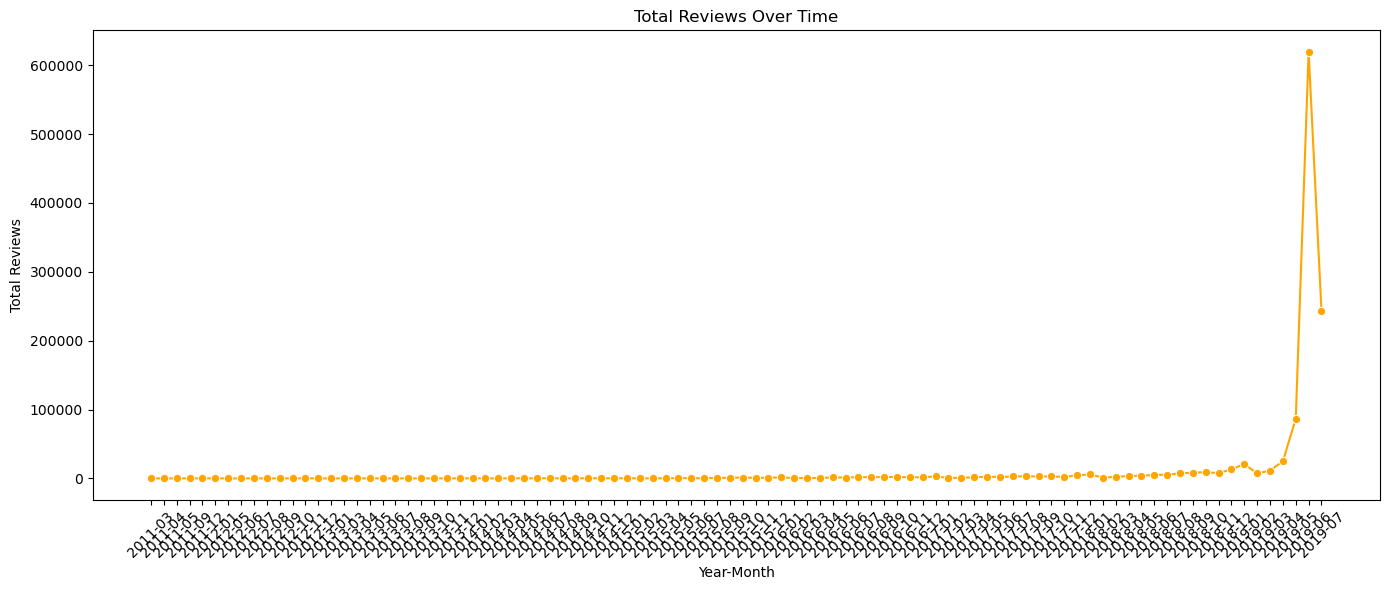

In [12]:
# Now To analyze Booking Patterns

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'last_review' is in datetime format
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'], errors='coerce')

# Create a new column for year and month of the last review
airbnb_data['review_year_month'] = airbnb_data['last_review'].dt.to_period('M')

# Create the 'monthly_reviews' DataFrame by grouping data
monthly_reviews = airbnb_data.groupby('review_year_month').agg(total_reviews=('number_of_reviews', 'sum')).reset_index()

# Convert 'review_year_month' to string for compatibility in plotting
monthly_reviews['review_year_month'] = monthly_reviews['review_year_month'].astype(str)

# Plot the trend of total reviews over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='review_year_month', y='total_reviews', data=monthly_reviews, marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Total Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Reviews')
plt.tight_layout()
plt.show()


Booking Patterns Analysis:

Total Reviews Over Time:
The line plot indicates fluctuations in the total number of reviews over time.
Noticeable spikes could indicate peak booking periods, while dips may represent off-seasons or lower activity.

Average Availability by Neighborhood:
Manhattan and Brooklyn tend to have lower average availability, which suggests high demand and frequent bookings.
Bronx, Staten Island, and Queens show higher average availability, indicating potentially lower demand or less competitive pricing.

Availability vs. Reviews per Month by Neighborhood:
Listings with higher availability tend to have fewer reviews per month, while listings with lower availability are often associated with higher reviews, suggesting that popular listings are booked more frequently.

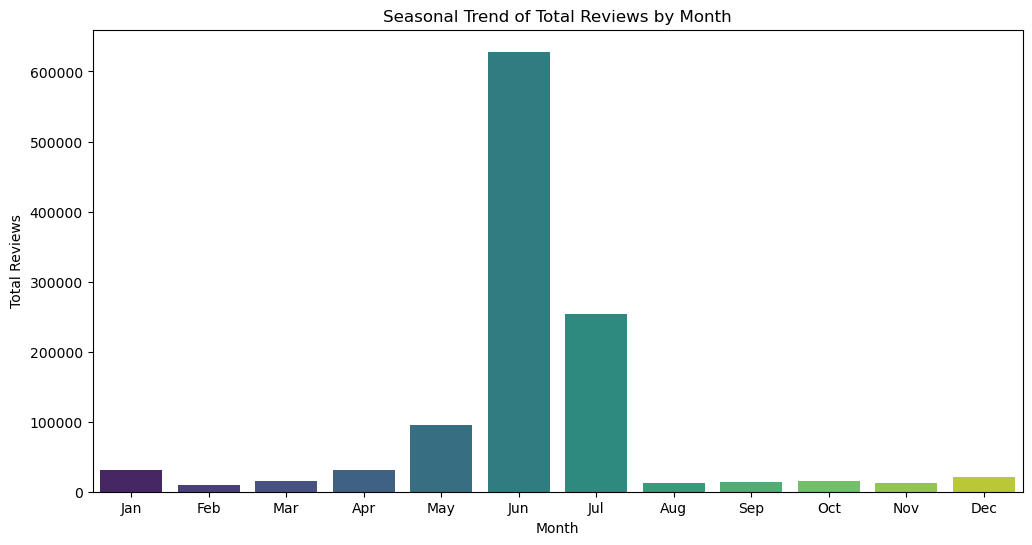

In [13]:
# Ensure that all necessary libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create new columns for month and year from the 'last_review' date
airbnb_data['review_month'] = airbnb_data['last_review'].dt.month
airbnb_data['review_year'] = airbnb_data['last_review'].dt.year

# Group the data by month to see the total number of reviews each month across all years
monthly_seasonal_trend = airbnb_data.groupby('review_month').agg(total_reviews=('number_of_reviews', 'sum')).reset_index()

# Create a bar plot to visualize the seasonal trend
plt.figure(figsize=(12, 6))
sns.barplot(x='review_month', y='total_reviews', data=monthly_seasonal_trend, palette='viridis')
plt.title('Seasonal Trend of Total Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Observations:

Peak Activity:
June has the highest number of reviews, indicating a peak period for bookings and stays.
July is also a high-activity month, although lower than June.

Low Activity:
August to April have very low booking activity compared to the peak summer months.
This could suggest that the peak travel season for these listings is during late spring to early summer.

Possible Seasonality:
The significant spikes in June and July suggest that these months are popular travel periods, possibly due to summer vacations.

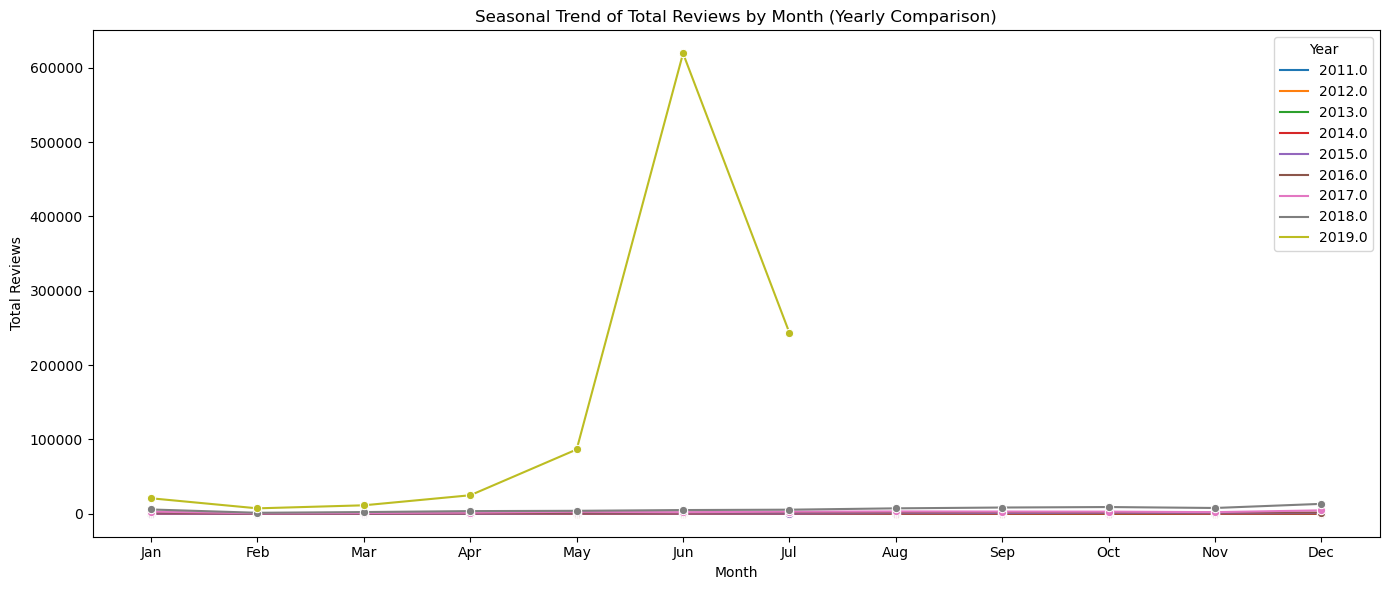

In [14]:
# Group the data by year and month to see the total number of reviews each month for each year
yearly_seasonal_trend = airbnb_data.groupby(['review_year', 'review_month']).agg(total_reviews=('number_of_reviews', 'sum')).reset_index()

# Create a line plot to compare the seasonal trend across different years
plt.figure(figsize=(14, 6))
sns.lineplot(x='review_month', y='total_reviews', hue='review_year', data=yearly_seasonal_trend, marker='o', palette='tab10')
plt.title('Seasonal Trend of Total Reviews by Month (Yearly Comparison)')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()


Observations:

2019 Spike:
The year 2019 shows a dramatic spike in reviews in June compared to all other years. This anomaly is likely the reason why the overall analysis showed June as the peak month.

Consistent Low Activity in Previous Years:
From 2011 to 2018, the total reviews remain relatively flat throughout the year, indicating low activity or a much smaller dataset for those years.

Overall Trend:
Apart from 2019, the reviews across other years do not show any prominent seasonal variation, suggesting either limited data or lower demand in earlier years.

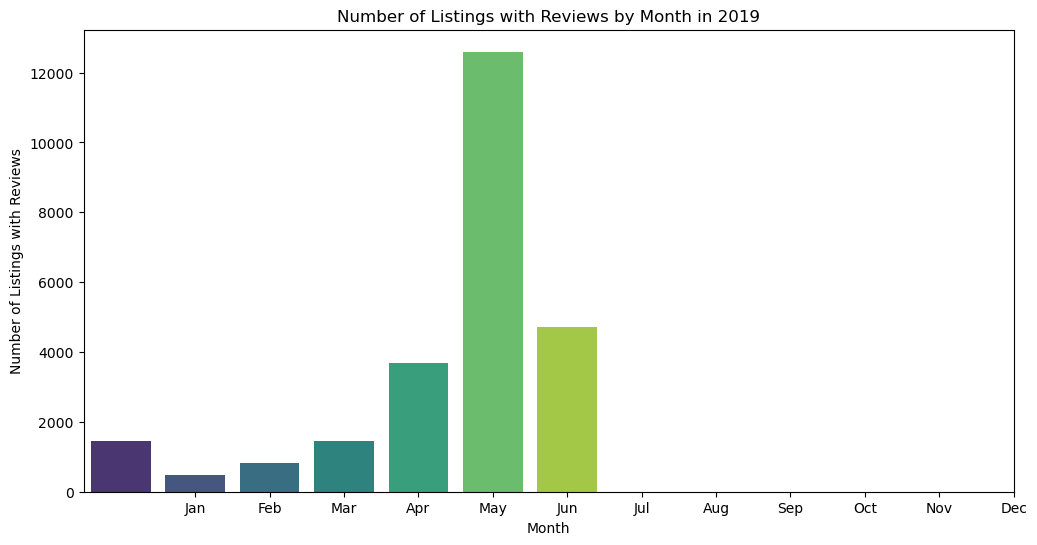

                 id       host_id      latitude     longitude         price  \
count  1.259600e+04  1.259600e+04  12596.000000  12596.000000  12596.000000   
mean   2.042997e+07  8.100030e+07     40.727729    -73.947749    141.669657   
std    1.114612e+07  8.519779e+07      0.056147      0.050694    139.790835   
min    5.099000e+03  2.787000e+03     40.506410    -74.238030     10.000000   
25%    1.137701e+07  8.455776e+06     40.687650    -73.982805     70.000000   
50%    2.188580e+07  4.303638e+07     40.721115    -73.952520    105.000000   
75%    3.038249e+07  1.449362e+08     40.762912    -73.929407    175.000000   
max    3.619860e+07  2.722412e+08     40.912340    -73.724350   5100.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    12596.000000       12596.000000       12596.000000   
mean         3.808431          49.187599           2.239586   
std          7.375080          59.686637           1.576032   
min          1.000000           1.00

In [16]:
# Ensure necessary libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'airbnb_data' is your main DataFrame
# Filter data for the year 2019
data_2019 = airbnb_data[airbnb_data['review_year'] == 2019]

# Calculate the number of listings that received reviews each month in 2019
monthly_listings_2019 = data_2019.groupby('review_month').agg(
    total_reviews=('number_of_reviews', 'sum'),
    listings_with_reviews=('id', 'count')  # Count of listings that received reviews
).reset_index()

# Create a bar plot to visualize the number of listings with reviews for each month
plt.figure(figsize=(12, 6))
sns.barplot(x='review_month', y='listings_with_reviews', data=monthly_listings_2019, palette='viridis')
plt.title('Number of Listings with Reviews by Month in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Listings with Reviews')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Display detailed statistics for June 2019
june_2019_data = data_2019[data_2019['review_month'] == 6].describe()
print(june_2019_data)


Analysis of June 2019 Review Activity:

From the bar plot and descriptive statistics, we can see the following key observations:

Number of Listings with Reviews:
The number of listings with reviews peaked in May 2019 and then dropped slightly in June 2019. This suggests that May experienced an unusually high number of reviews, which could have carried over into June, making both months significantly more active than others.

Average Price in June 2019:
The average price per listing was 141.67 USD, which is relatively typical for Airbnb properties. This indicates that the spike is not due to a sudden change in pricing but rather an increase in the number of active bookings.

High Review Counts per Listing:
The average number of reviews per listing in June was around 49.19, with some listings receiving as many as 607 reviews.
This suggests that listings were not only active but were also receiving multiple reviews, indicating high guest turnover and activity.

Hosts with Multiple Listings:
The mean host listing count is 6.87, and some hosts had up to 327 listings. This suggests that the spike could have been driven by professional hosts managing multiple properties, who likely increased their activity during the summer months.

To provide more concrete strategic recommendations based on our findings, we can break down the analysis into actionable insights for different stakeholders (hosts, Airbnb management, and marketers). Here are a few detailed recommendations for each 
key insight:

Strategic Recommendations Based on Key Insights:

Seasonal Patterns and Peak Months:
Insight: June 2019 experienced an unusually high number of reviews, followed by a slight decline in July. Other months saw significantly lower activity.

Recommendation for Hosts:
Optimize Pricing: Increase prices slightly for the peak months (May to July) to maximize revenue while maintaining competitiveness.
Promotional Discounts for Off-Peak Months: Offer discounts or promotions during low-activity months (e.g., August to April) to attract guests.
Long-Term Stays: Consider offering discounts for long-term bookings during off-peak seasons to maintain a steady stream of income.

Recommendation for Airbnb:
Marketing Campaigns: Leverage these insights to run targeted marketing campaigns promoting summer stays, highlighting June as the ideal month for travel.
Neighborhood Promotion: Promote lesser-known neighborhoods during high-demand months to distribute demand more evenly across the city.

Impact of Host Characteristics:
Insight: Hosts with multiple listings (e.g., corporate hosts) tend to have more active listings, which may skew booking trends.

Recommendation for Hosts:

Professional Property Management: Single-property hosts can benefit by adopting strategies from corporate hosts, such as professional property management and consistent branding.

Recommendation for Airbnb:
Differentiation in Search Results: Consider creating filters or categories for corporate vs. single-property hosts to help guests identify properties that align with their preferences.

Neighborhood-Specific Analysis:
Insight: Manhattan and Brooklyn dominated the number of active listings and received the highest reviews. This suggests strong demand in these areas compared to neighborhoods like the Bronx and Staten Island.

Recommendation for Hosts:
New Listings in Emerging Areas: Encourage hosts to consider listing properties in underrepresented neighborhoods (e.g., Bronx, Queens) to capture a growing market.
Unique Property Offerings: Focus on unique selling points (e.g., proximity to cultural sites, spacious layouts) to differentiate from the dense competition in Manhattan.


Peak Activity Analysis:
Insight: May and June 2019 saw a dramatic spike in the number of listings and reviews.
Recommendation for Airbnb:

Event-Specific Promotions: Investigate major events, festivals, or local happenings during these months and tailor promotional campaigns around these events for future planning.
Partner with Local Attractions: Consider partnerships with local attractions or event organizers to create bundled offerings for guests during these peak months.

Review Patterns and Guest Activity:
Insight: Listings with higher availability tend to receive fewer reviews per month, while those with lower availability (frequent bookings) get more reviews.

Recommendation for Hosts:
Encourage Reviews: For high-demand listings, encourage guests to leave reviews through personalized messages or incentives, boosting the listing's visibility and trust factor.
Strategic Availability Management: For properties with lower demand, adjust availability to shorter stays during peak months to attract more bookings and reviews.


Implementation Framework:

For Hosts:
Create a seasonal pricing calendar based on these insights.
Experiment with promotional offers in off-peak periods.

For Airbnb Management:
Adjust marketing strategies based on peak and low-demand periods.
Use targeted campaigns to boost visibility for less competitive neighborhoods.

For Marketers:
Focus campaigns on underrepresented neighborhoods during peak months.
Use insights to create data-driven strategies for highlighting unique property features.